In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
a = pd.read_csv("Base Estudo K Means.csv",sep=';',decimal = ',')

FileNotFoundError: File b'Base Estudo K Means.csv' does not exist

In [3]:
from sklearn import preprocessing
def normalizar(df,coluna):
    x = df[[coluna]].values.astype(float)
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_normalized = pd.DataFrame(x_scaled,columns=[coluna])
    return df_normalized
def aplica_norm(df, colunas):
    for i in colunas:
        df[i + '_normalizado'] = normalizar(df,i)
aplica_norm(a,('FGTS_familiar_Proposta','Renda_Bruta_Familiar_Proposta','Preço Venda'))

NameError: name 'a' is not defined

In [422]:
a_n = a.drop(['Renda_Bruta_Familiar_Proposta', 'Preço Venda', 'FGTS_familiar_Proposta'], axis=1)

In [423]:
a_n = a_n[a_n['TIPOLOGIA_PARA'] != 'PNE']
a_n = a_n[a_n['TIPOLOGIA_PARA'] != '1 DORM']

In [424]:
a_n.TIPOLOGIA_PARA.value_counts()

Faixa 2      72407
FAIXA 1,5    69095
Name: TIPOLOGIA_PARA, dtype: int64

In [336]:
a.head()

,Proposta,UF,Empreendimento,Descricao_da_Torre,Unidade_Apto,Cod_Cliente,Preço Venda,Renda_Bruta_Familiar_Proposta,Cliente_Cotista_Proposta,FGTS_familiar_Proposta,Data_da_Venda,TIPOLOGIA_PARA,TIPO_PARC,Numero_de_Parcelas,Valor_da_Parcela,Valor_Total,FGTS_familiar_Proposta_normalizado,Renda_Bruta_Familiar_Proposta_normalizado,Preço Venda_normalizado
0,PRO-168923-N6K9S2,RJ,RES PARQUE REAL GARDEN,TORRE 4,304,200046,156700.0,2250.0,Sim,0.0,2017-01-01,Faixa 2,Entrada,1,500.00,500.00,0.0,0.022069,0.261167
1,PRO-168923-N6K9S2,RJ,RES PARQUE REAL GARDEN,TORRE 4,304,200046,156700.0,2250.0,Sim,0.0,2017-01-01,Faixa 2,Pré-Chaves Intermediária,1,3490.00,3490.00,0.0,0.022069,0.261167
2,PRO-168923-N6K9S2,RJ,RES PARQUE REAL GARDEN,TORRE 4,304,200046,156700.0,2250.0,Sim,0.0,2017-01-01,Faixa 2,Pré-Chaves,14,521.00,7294.00,0.0,0.022069,0.261167
3,PRO-168923-N6K9S2,RJ,RES PARQUE REAL GARDEN,TORRE 4,304,200046,156700.0,2250.0,Sim,0.0,2017-01-01,Faixa 2,REPASSE,1,119938.97,119938.97,0.0,0.022069,0.261167
4,PRO-168923-N6K9S2,RJ,RES PARQUE REAL GARDEN,TORRE 4,304,200046,156700.0,2250.0,Sim,0.0,2017-01-01,Faixa 2,Pós-Chave,24,225.00,5400.00,0.0,0.022069,0.261167


In [326]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146651 entries, 0 to 146650
Data columns (total 19 columns):
Proposta                                     146651 non-null object
UF                                           146651 non-null object
Empreendimento                               146651 non-null object
Descricao_da_Torre                           146651 non-null object
Unidade_Apto                                 146651 non-null object
Cod_Cliente                                  146651 non-null int64
Preço Venda                                  146651 non-null float64
Renda_Bruta_Familiar_Proposta                146651 non-null float64
Cliente_Cotista_Proposta                     146406 non-null object
FGTS_familiar_Proposta                       146651 non-null float64
Data_da_Venda                                146651 non-null datetime64[ns]
TIPOLOGIA_PARA                               146651 non-null object
TIPO_PARC                                    146651 non-null ob

In [327]:
a.Proposta.value_counts().head(15)

PRO18062138227    22
PRO18042528088    20
PRO18051031049    20
PRO18071642334    19
PRO18101163069    18
PRO17111001993    18
PRO17121406965    17
PRO18030519403    16
PRO18091455944    16
PRO18112971671    16
PRO18112971653    16
PRO18111469282    16
PRO18111369193    16
PRO18102765954    16
PRO18122775793    16
Name: Proposta, dtype: int64

In [328]:
#soma por uf em milhões
a.groupby('UF').sum()/1000000

,Cod_Cliente,Preço Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Numero_de_Parcelas,Valor_da_Parcela,Valor_Total,FGTS_familiar_Proposta_normalizado,Renda_Bruta_Familiar_Proposta_normalizado,Preço Venda_normalizado
UF,,,,,,,,,,
BA,9452.380361,3268.436611,54.309633,148.918240,0.246210,587.035632,627.623892,1.529247e-04,5.326829e-04,0.005447
DF,4.871636,2.896050,0.069177,0.158656,0.000132,0.990722,1.028050,1.629242e-07,6.785032e-07,0.000005
GO,164.000565,55.508547,0.915043,1.863404,0.004670,7.705272,8.627509,1.913536e-06,8.974973e-06,0.000093
MG,3520.906399,1307.307223,21.402882,50.240997,0.101196,254.534037,275.228836,5.159267e-05,2.099250e-04,0.002179
PA,14.765127,6.915967,0.304403,0.266107,0.000548,3.223908,3.412941,2.732662e-07,2.985677e-06,0.000012
PE,4231.042997,1449.953203,23.676223,57.299418,0.124556,265.101959,285.967111,5.884099e-05,2.322225e-04,0.002417
PR,2092.506325,726.075096,10.548028,20.024067,0.046495,112.982587,121.435131,2.056279e-05,1.034577e-04,0.001210
RJ,12327.298664,4686.681348,70.337281,197.720748,0.326168,877.260226,936.708673,2.030402e-04,6.898862e-04,0.007811
RS,7950.707723,2837.498173,44.324702,93.663448,0.198588,503.200083,540.160074,9.618336e-05,4.347480e-04,0.004729


In [310]:
a.groupby([pd.DatetimeIndex(a['Data_da_Venda']).year, 'UF']).sum()/1000000

Cod_Cliente  Preço Venda  Renda_Bruta_Familiar_Proposta  \
Data_da_Venda UF                                                            
2017          BA  3405.121732  1243.978577                      21.922765   
              DF     3.188901     1.821050                       0.049946   
              MG  1373.774917   548.470791                       9.672525   
              PA    11.135754     5.262131                       0.232707   
              PE  1381.904148   498.153763                       8.360649   
              PR   268.186147    95.753366                       1.401299   
              RJ  3441.584296  1416.166611                      21.802389   
              RS  2283.829540   862.973264                      14.555425   
              SP  4549.916288  2097.788496                      35.398967   
2018          BA  5141.541381  1733.891950                      27.321318   
              DF     1.682735     1.075000                       0.019230   
              GO    10.308455     3.821932                       0.147520   
              MG  1914.394816   678.204677                      10.365172   
              PA     3.629373     1.653836                       0.071696   
              PE  2380.912331   806.544937                      12.850522   
              PR  1492.325536   518.585200                       7.550329   
              RJ  7489.997029  2805.679522                      41.149708   
              RS  4947.649382  1748.828812                      26.070180   
              SP  7871.644047  3314.644100                      54.938265   
2019          BA   905.717248   290.566084                       5.065549   
              GO   153.692110    51.686615                       0.767523   
              MG   232.736666    80.631754                       1.365185   
              PE   468.226518   145.254503                       2.465052   
              PR   331.994642   111.736530                       1.596399   
              RJ  1395.717339   464.835215                       7.385184   
              RS   719.228801   225.696097                       3.699096   
              SP  1496.359051   596.397083                      10.184493   

                  FGTS_familiar_Proposta  Numero_de_Parcelas  \
Data_da_Venda UF                                               
2017          BA               55.217019            0.115480   
              DF                0.016472            0.000127   
              MG               22.152946            0.049046   
              PA                0.266107            0.000498   
              PE               16.959780            0.047133   
              PR                2.283780            0.005385   
              RJ               58.480796            0.115946   
              RS               27.894251            0.080696   
              SP              114.170091            0.161440   
2018          BA               80.258180            0.111758   
              DF                0.142184            0.000005   
              GO                0.201565            0.000248   
              MG               24.818408            0.046052   
              PA                0.000000            0.000050   
              PE               34.372205            0.064578   
              PR               14.669378            0.031903   
              RJ              118.470417            0.177430   
              RS               58.300325            0.102433   
              SP              195.553969            0.143050   
2019          BA               13.443041            0.018972   
              GO                1.661839            0.004422   
              MG                3.269643            0.006098   
              PE                5.967432            0.012845   
              PR                3.070908            0.009207   
              RJ               20.769536            0.032792   
              RS                7.468872            0.01

In [225]:
sns.set_style('darkgrid')
sns.set(font_scale=1.2)

In [197]:
a['Year'] = pd.DatetimeIndex(a['Data_da_Venda']).year
a['Month'] = pd.DatetimeIndex(a['Data_da_Venda']).month

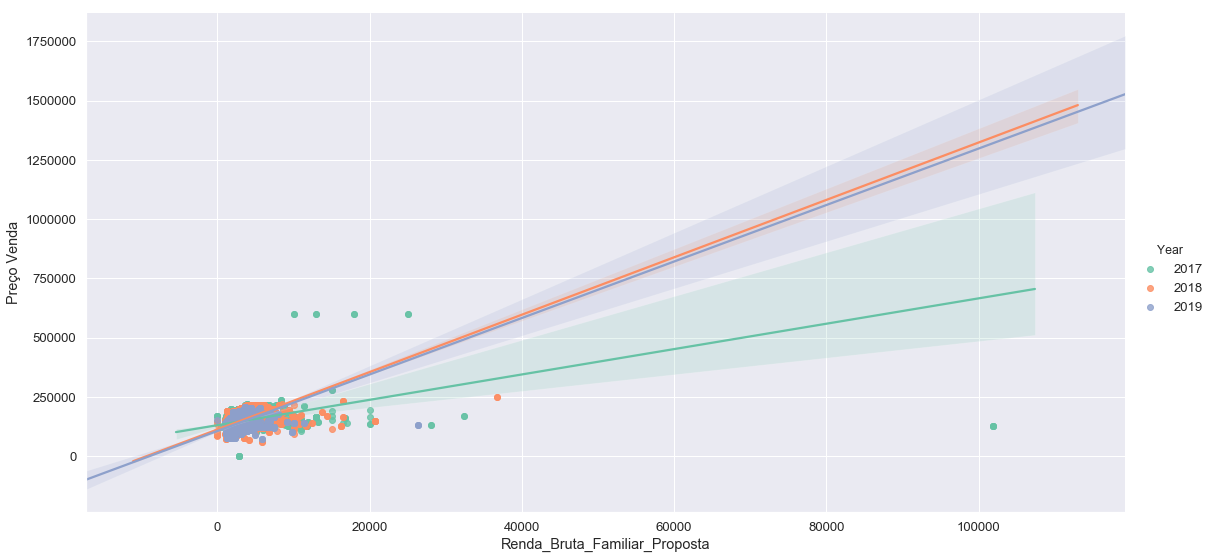

In [229]:
sns.lmplot(x='Renda_Bruta_Familiar_Proposta', y='Preço Venda', data=a, hue='Year', 
           palette='Set2', size=8, aspect=2)

In [212]:
a_less = pd.DataFrame(a.groupby(['Year', 'Month']).sum()['Preço Venda'])

In [213]:
a_l = a_less.pivot_table(values='Preço Venda', index='Month', columns='Year')

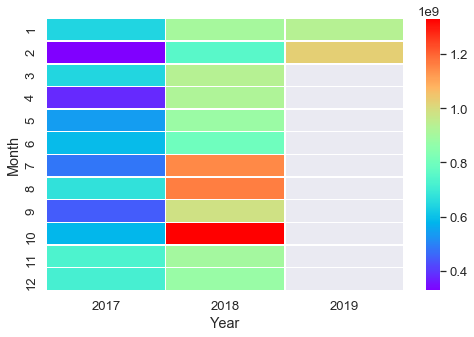

In [226]:
#grafico de calor, preço de venda
plt.figure(figsize=(8, 5))
sns.heatmap(a_l, linewidths=.5, cmap='rainbow')

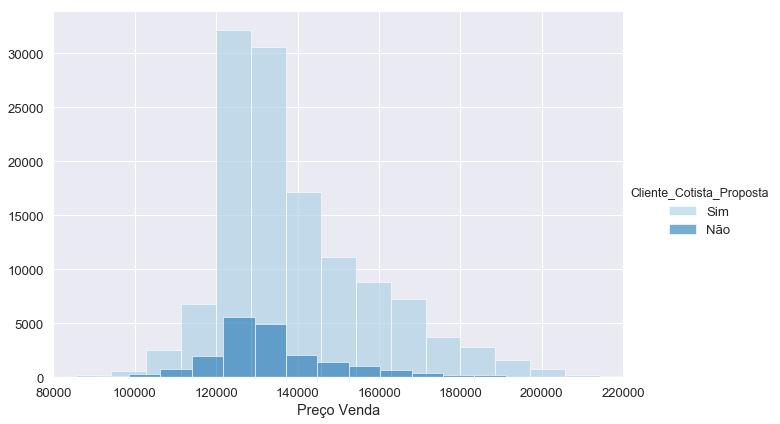

In [441]:
h = sns.FacetGrid(a, hue='Cliente_Cotista_Proposta', size=6, aspect=1.5, palette='Paired', xlim=(80000, 220000))
h.map(plt.hist, 'Preço Venda', bins=70, alpha=0.6).add_legend()

In [283]:
from sklearn.cluster import KMeans

1 558229181475580.1
2 92950971574038.03
3 69861995411135.805
4 51409695233420.9
5 37076465009333.39
6 27659586729779.676
7 22600715464694.168
8 20218621043907.395
9 18159368529177.83


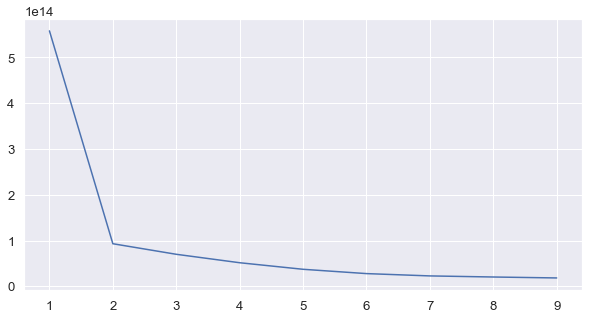

In [425]:
w = []
for i in range(1, 10):
    k = KMeans(n_clusters = i).fit(a_n.drop(a.select_dtypes(include=['object', 'datetime64']), 
                                          axis=1))
    print (i,k.inertia_)
    w.append(k.inertia_)  
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), w)

In [436]:
k = KMeans(n_clusters=2).fit(a_n.drop(a_n.select_dtypes(include=['object', 'datetime64']), axis=1))

In [432]:
print(k.cluster_centers_)
print('\n')
print(k.labels_)

[[3.66361677e+05 1.14859558e+01 4.66366393e+03 6.98908772e+03
  6.38515463e-03 2.17693334e-02 2.32016146e-01]
 [3.56877747e+05 1.00000000e+00 1.28157225e+05 1.28157225e+05
  8.15427145e-03 2.58644008e-02 2.48634694e-01]
 [3.71000367e+05 1.00000000e+00 8.60103224e+04 8.60103224e+04
  5.46847158e-03 1.88141967e-02 2.16806889e-01]]


[0 0 0 ... 0 1 0]


In [438]:
a_n['cluster'] = k.labels_

In [439]:
a_n.cluster.value_counts()

0    114372
1     27130
Name: cluster, dtype: int64